## Challenge Set 3 - Movies + Pandas 

Topic: Challenge Set 3  
Subject: Exploring a movies dataset  
Date of Submission: 10/8/2018  
Name: Andrée Werner  

## Challenge 1
- plot domestic total gross over time

In [14]:
import pandas as pd 
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline


In [15]:
df=pd.read_csv('/Users/andreewerner/Desktop/2013_movies.csv')
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [18]:
# change release date column to datetime object
df['ReleaseDate']=pd.to_datetime(df['ReleaseDate'])

Text(0,0.5,'Domestic Total Gross ($100m)')

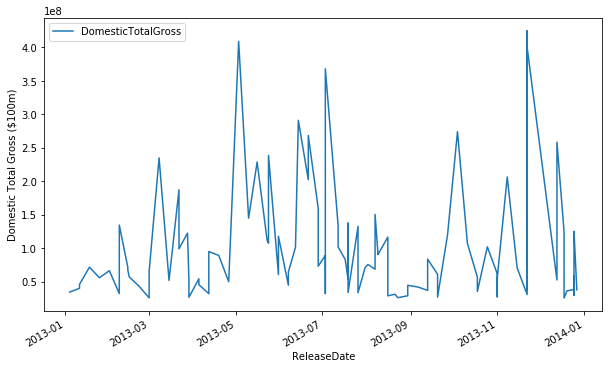

In [24]:
df.plot(x='ReleaseDate', y='DomesticTotalGross',figsize=(10,6))
plt.ylabel('Domestic Total Gross ($100m)')

## Challenge 2 
- plot runtime vs. domestic total gross


Text(0,0.5,'Domestic Total Gross (in $100m)')

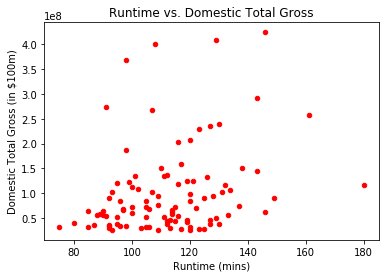

In [31]:
df.plot(x = 'Runtime', y = 'DomesticTotalGross', kind = 'scatter', c='r')
plt.title('Runtime vs. Domestic Total Gross')
plt.xlabel('Runtime (mins)')
plt.ylabel('Domestic Total Gross (in $100m)')

## Challenge 3 
- group data by rating and find average runtime and domestic total gross for each rating level

In [65]:
by_rating=df.groupby('Rating').mean()
by_rating.loc[:,['Runtime', 'DomesticTotalGross']]

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


## Challenge 4
- make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f265a20>,
      dtype=object)

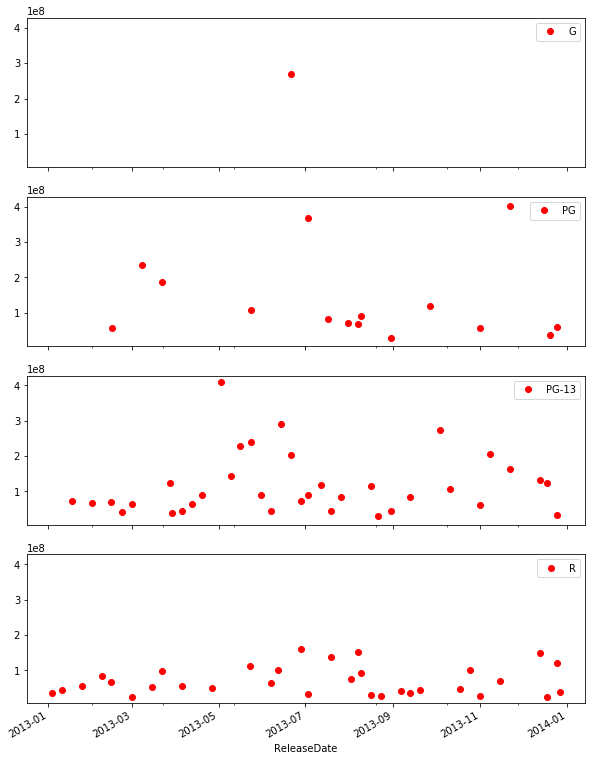

In [63]:
rating=pd.pivot_table(df, values = 'DomesticTotalGross', index='ReleaseDate', columns = 'Rating')
rating.plot(subplots=True, figsize=(10,14), sharey = True, style= 'ro', )

## Challenge 5
- What director in your dataset has the highest gross per movie? From below, looks like Spike Jonze tops the list as highest grossing director!



In [42]:
df_directors = df.groupby('Director').mean()
df_directors.sort_values(by='DomesticTotalGross').reset_index().head()

,Director,Budget,DomesticTotalGross,Runtime
0,Spike Jonze,23000000.0,25568251.0,120.0
1,Jon LucasScott Moore,13000000.0,25682380.0,93.0
2,Edgar Wright,20000000.0,26004851.0,109.0
3,Andrew Niccol,40000000.0,26627201.0,125.0
4,Ron Howard,38000000.0,26947624.0,123.0


## Challenge 6
- Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.



In [57]:
df_binned = df.groupby(pd.Grouper(key = 'ReleaseDate', freq='M'))['DomesticTotalGross']

#calculating standard error 
mean=df_binned.mean()
std=df_binned.std()
n=df_binned.count()
mean_error=std/(np.sqrt(n))

mean.index = [x.strftime('%b') for x in mean.index]
mean_error.index = [x.strftime('%b') for x in mean_error.index]

- Title of graph should include: Mean Domestic Total Gross by Month in 2013


Text(0,0.5,'Domestic Total Gross ($100m)')

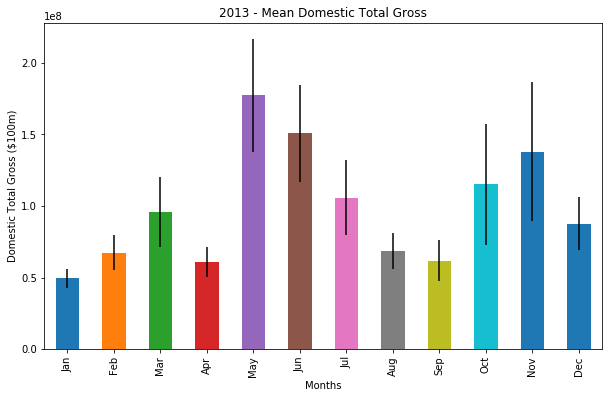

In [61]:
mean.plot(yerr = mean_error, kind = 'bar', figsize = (10,6), style = 'y')        
plt.title('2013 - Mean Domestic Total Gross')
plt.xlabel('Months')
plt.ylabel('Domestic Total Gross ($100m)')

- Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

- The formula is s/sqrt(n), where s is standard deviation and n is sample size 
   
- The gross profits seem to vary more around the mean. Given the standard error formula, the range in error increases during dense movies months, which computes.